In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Datasets with missing values are common in data science. There are many different ways to deal with them. The first step in the process is to decide whether to amputate or impute the rows with missing values. In this notebook I will explore ways to make this decision using the dummy data I have created in the last notebook.

PS. I've manually generated the data and tried to make it as representative as I can, but there may be some odd entries where newborns weigh 20 kilos or adults weigh 10 kilos. As long as the distribution is appropriate, I think the results will make sense.

In [2]:
df = pd.read_excel('dummy_data.xlsx')
df.head()

,Age,Gender,Height,Weight
0,24.715848,Female,149.395236,41.287038
1,34.627655,Female,156.229380,62.407135
2,24.277994,Female,173.499875,61.375137
3,39.202478,Male,184.974474,71.885377
4,11.643534,Female,169.452767,60.452363


In [3]:
df.describe()

,Age,Height,Weight
count,10000.000000,10000.000000,10000.000000
mean,26.108230,170.237427,59.367920
std,13.758309,14.141019,25.008782
min,0.946607,123.322555,0.114624
25%,15.757666,159.708733,41.263789
50%,23.919981,170.030022,57.419554
75%,34.319253,180.839417,76.349829
max,100.866112,212.429692,166.660443


Let's create random missing data (1.000 observations) for feature `Height` in the data file.

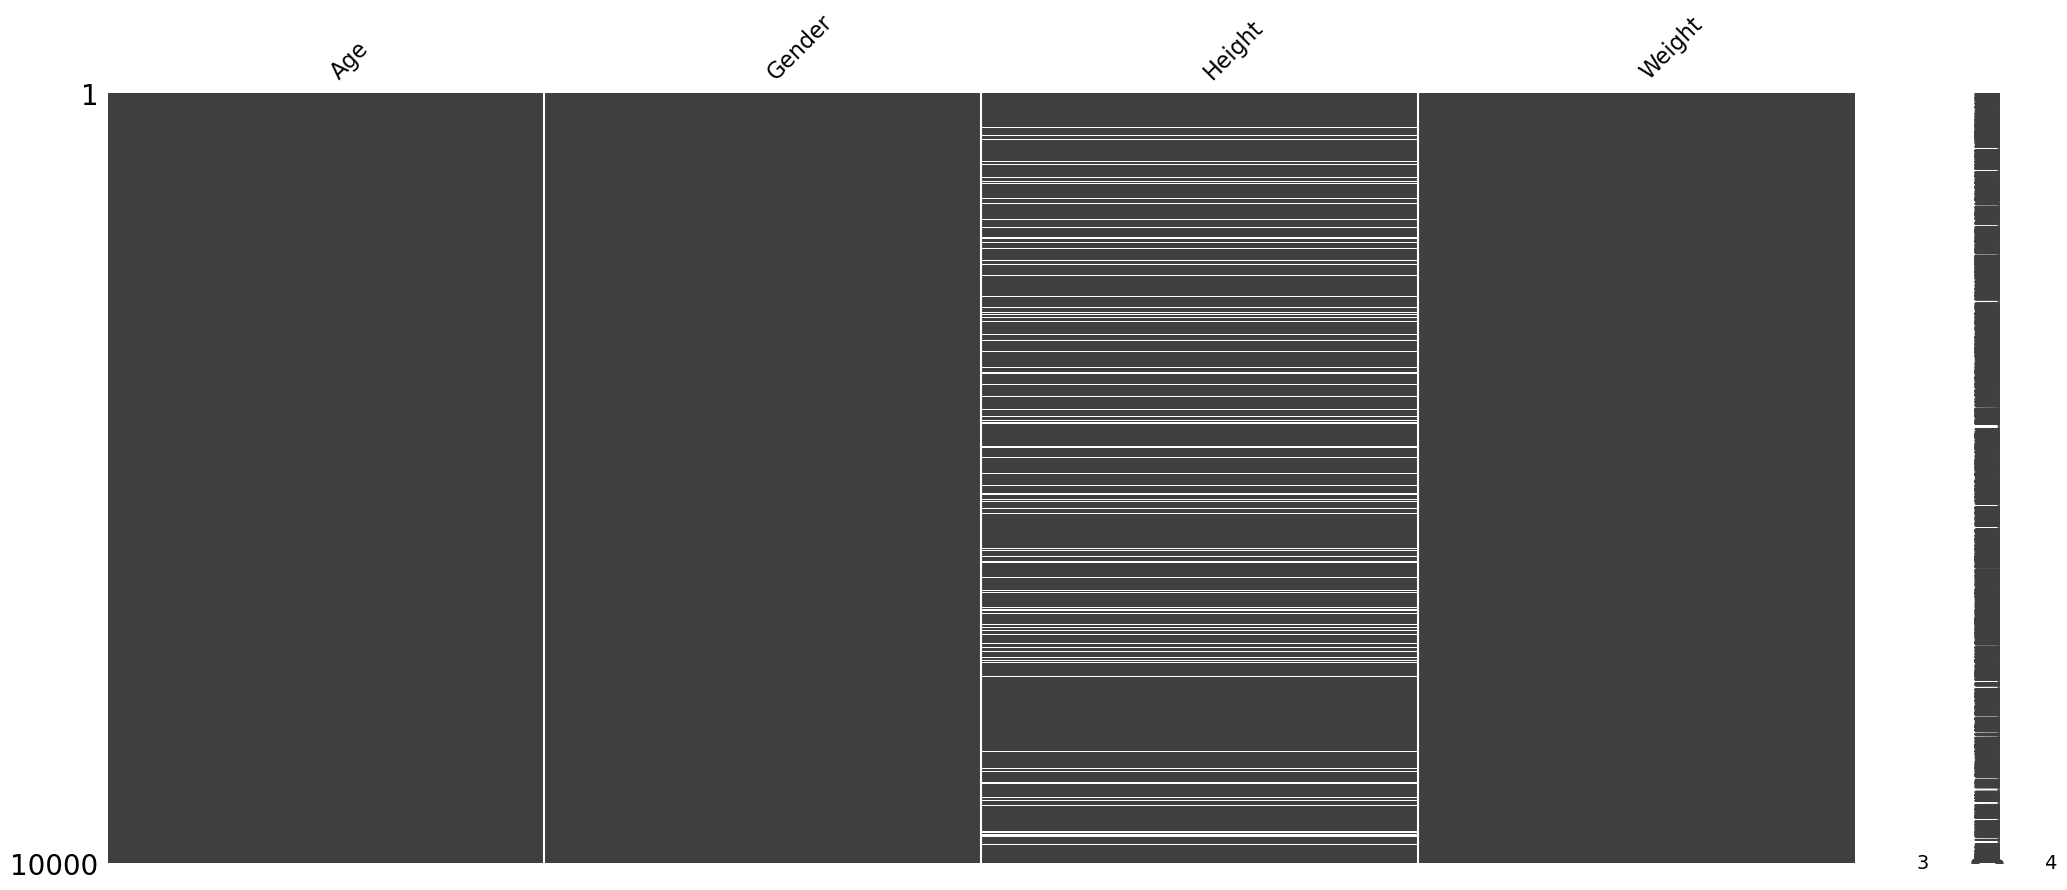

In [4]:
import missingno as msno
df1 = df.copy()
df1.loc[df1.sample(1000).index, 'Height'] = np.nan
msno.matrix(df1);

In [5]:
df1.describe()

,Age,Height,Weight
count,10000.000000,9000.000000,10000.000000
mean,26.108230,170.199306,59.367920
std,13.758309,14.117494,25.008782
min,0.946607,123.322555,0.114624
25%,15.757666,159.750901,41.263789
50%,23.919981,170.008859,57.419554
75%,34.319253,180.792235,76.349829
max,100.866112,212.429692,166.660443


Now we have to decide if we need rows with missing values to build a suitable model. To do this, we will create a new column for each row containing "1" if "Height" is missing, and "0" otherwise. We will then use this column to divide the other columns into two (the "1" and "0" ones in the new column) and check for a statistically significant difference between the two cluster means.

In [6]:
df1['Height_missing'] = np.where(df1['Height'].isnull(), 1, 0)

We will use the two-sample t test for categorical features. 

In [7]:
from scipy.stats import ttest_ind

In [8]:
c1 = df1[df1['Height_missing'] == 0]['Age']
c2 = df1[df1['Height_missing'] == 1]['Age']

t,p = ttest_ind(c1, c2, equal_var=False)

if p <= 0.025: 
    print('The age data of the rows with missing values have a statistically significant difference compared to the complete ones.')
else:
    print('The age data of the rows with missing values do not have a statistically significant difference compared to the complete ones.')

The age data of the rows with missing values do not have a statistically significant difference compared to the complete ones.


In [9]:
c1 = df1[df1['Height_missing'] == 0]['Weight']
c2 = df1[df1['Height_missing'] == 1]['Weight']

t,p = ttest_ind(c1, c2, equal_var=False)

if p <= 0.025: 
    print('The Weight data of the rows with missing values have a statistically significant difference compared to the complete ones.')
else:
    print('The Weight data of the rows with missing values do not have a statistically significant difference compared to the complete ones.')

The Weight data of the rows with missing values do not have a statistically significant difference compared to the complete ones.


We will use the chi-square test for categorical features.

In [10]:
from scipy.stats import chi2_contingency

In [11]:
cross = pd.crosstab(df1['Gender'], df1['Height_missing'])
c1 = cross.iloc[:,0].tolist()
c2 = cross.iloc[:,1].tolist()

test_stat,p,ddof,expected = chi2_contingency([c1, c2], correction=False)


if p <= 0.05: 
    print('The Gender data of the rows with missing values have a statistically significant difference compared to the complete ones.')
else:
    print('The Gender data of the rows with missing values do not have a statistically significant difference compared to the complete ones.')

The Gender data of the rows with missing values do not have a statistically significant difference compared to the complete ones.


In this case, missing values have no relationship with the existing values, as we generate the missing data completely at randomly. This missingness type is called Missing Completely At Random (MCAR). Deleting the rows with missing values is considered to be safe for this type.

Now we will create another dataset with missing data but this time missingness will not be random at all.

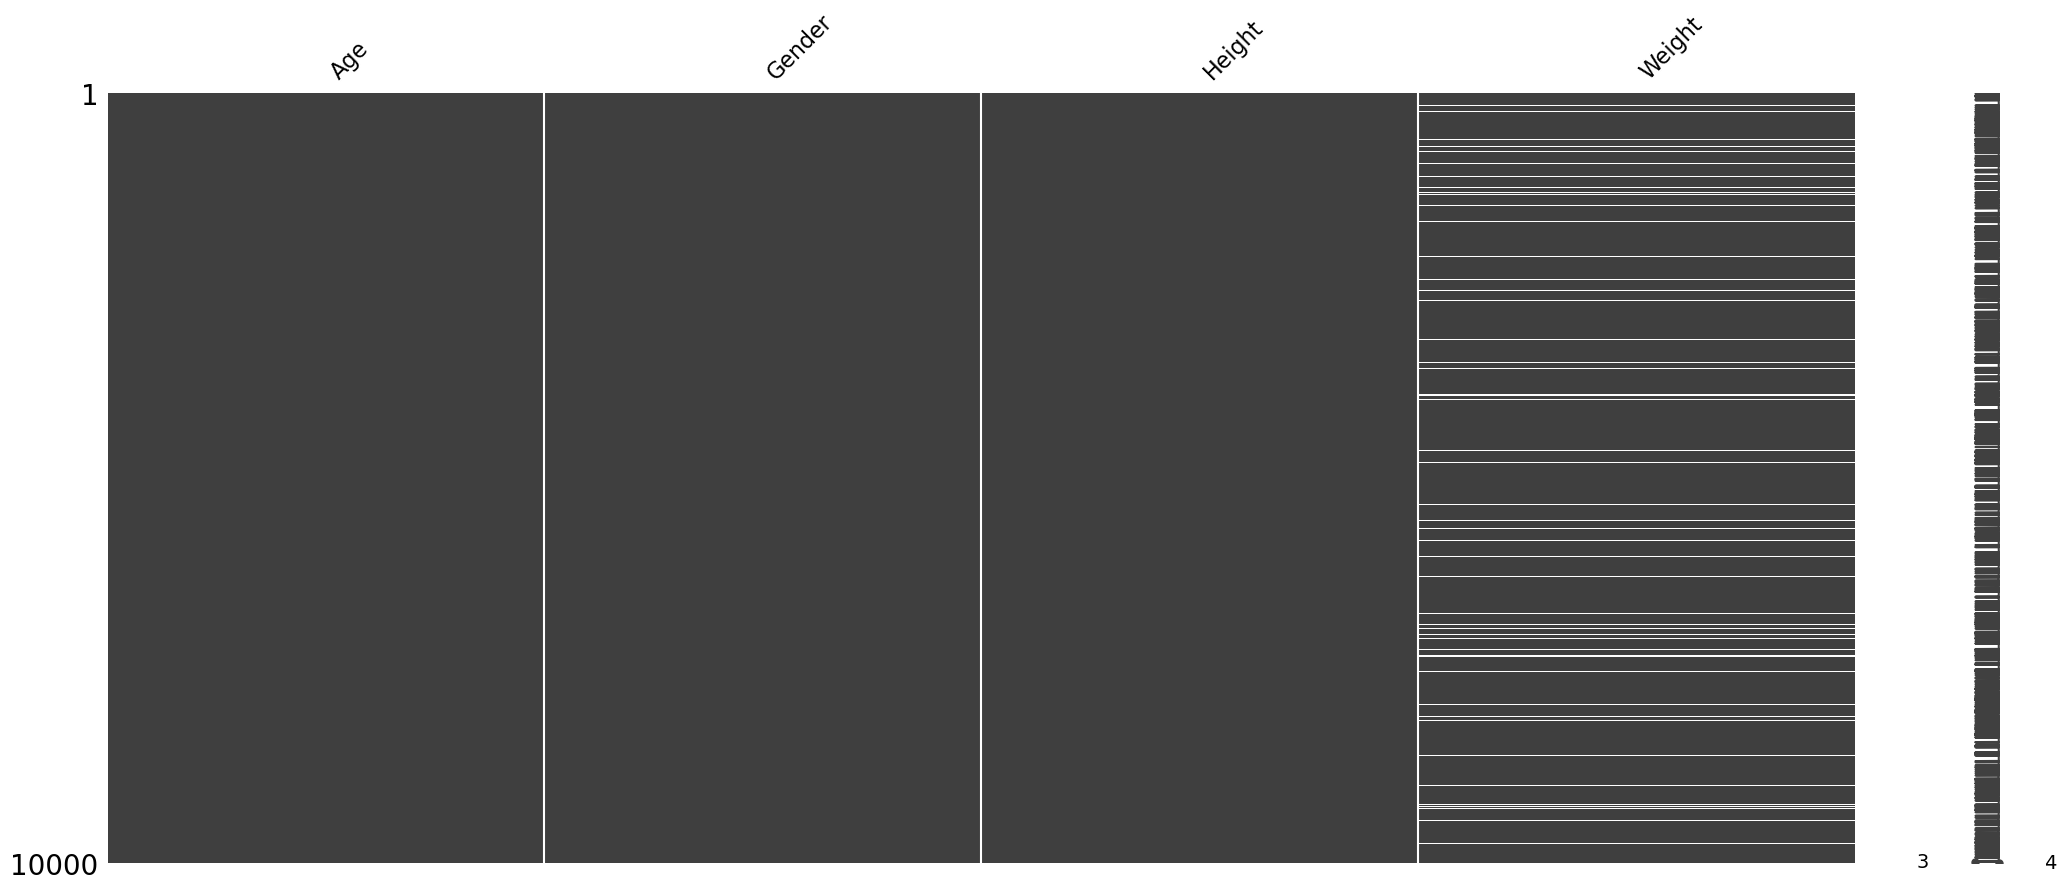

In [12]:
df1 = df.copy()
df1.loc[df1[df1.Weight>100].index, 'Weight'] = np.nan
msno.matrix(df1);

I have cleared the weights above 100 kilos. Now, lets follow the same steps and see if there is any difference.

In [13]:
df1['Weight_missing'] = np.where(df1['Weight'].isnull(), 1, 0)

In [14]:
c1 = df1[df1['Weight_missing'] == 0]['Age']
c2 = df1[df1['Weight_missing'] == 1]['Age']

t,p = ttest_ind(c1, c2, equal_var=False)

if p <= 0.025: 
    print('The age data of the rows with missing values have a statistically significant difference compared to the complete ones.')
else:
    print('The age data of the rows with missing values do not have a statistically significant difference compared to the complete ones.')

The age data of the rows with missing values have a statistically significant difference compared to the complete ones.


In [15]:
c1 = df1[df1['Weight_missing'] == 0]['Height']
c2 = df1[df1['Weight_missing'] == 1]['Height']

t,p = ttest_ind(c1, c2, equal_var=False)

if p <= 0.025: 
    print('The Height data of the rows with missing values have a statistically significant difference compared to the complete ones.')
else:
    print('The Height data of the rows with missing values do not have a statistically significant difference compared to the complete ones.')

The Height data of the rows with missing values have a statistically significant difference compared to the complete ones.


In [16]:
cross = pd.crosstab(df1['Gender'], df1['Weight_missing'])
c1 = cross.iloc[:,0].tolist()
c2 = cross.iloc[:,1].tolist()

test_stat,p,ddof,expected = chi2_contingency([c1, c2], correction=False)


if p <= 0.05: 
    print('The Gender data of the rows with missing values have a statistically significant difference compared to the complete ones.')
else:
    print('The Gender data of the rows with missing values do not have a statistically significant difference compared to the complete ones.')

The Gender data of the rows with missing values have a statistically significant difference compared to the complete ones.


In this scenerio, because we have intentionally deleted a particular cluster, missingness of the data creates bias. Since there is a relationship between rows with missing data and others, the best option here is to use an imputation technique.